# Estandarización de los datos

## Importaciones

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import keras
from keras.utils import to_categorical
from keras import models, layers
from sklearn.preprocessing import LabelEncoder, StandardScaler

from pickle import dump, load  # pickle se usa para serializar objetos

### Lectura del dataset

Acceso a Google Drive

In [ ]:
# Versión para Google Colab
from google.colab import drive  # montar Google Drive
drive.mount('/content/gdrive')
DIRECTORIO = '/content/gdrive/MyDrive/CursoDL/datasets/' #  directorio de trabajo

# Versión para Windows
# DIRECTORIO = 'c:/temp/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Lectura del dataset ([Kaggle](https://www.kaggle.com/c/forest-cover-type-prediction))

In [ ]:
df = pd.read_csv(DIRECTORIO+'covtype.csv') # lee el fichero csv a un dataframe
ncols = df.shape[1]
print("Columnas:", df.columns)
print("\nValores distintos del la columna destino ('Cover_Type'): ",np.unique(df['Cover_Type'].to_numpy()))
print()
print(df.head())

Columnas: Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type3

### Conjuntos de entrenamiento y validación

In [ ]:
x = df[df.columns[1:ncols-1]] # selecciona predictores: deja fuera id (1ª col) y objetivo (última col)
y = df.Cover_Type             # columna objetivo
x_entr, x_val, y_entr, y_val = train_test_split(x, y , train_size = 0.7, random_state =  90)

### Codificación *One-hot* del objetivo
*Si el número de posibles salidas fuese muy alto, no se codificaría como 'one-hot'*

In [ ]:
# creamos el codificador: los valores de la columna objetivo van de 1 a 7 -> la 0 no se usa
labenc = LabelEncoder()

# Le pasamos la columna con todos los datos a codificar
labenc.fit(y)

# obtención de las columnas objetivo codificadas (entrenamiento y validación)
y_entr_codif = labenc.transform(y_entr) # valores ahora van de 0 a 6
y_entr_1h = to_categorical(y_entr_codif)

y_val_codif = labenc.transform(y_val)
y_val_1h = to_categorical(y_val_codif)

### Creación del modelo
*Se usa softmax como función de activación debido a que la columna objetivo está codificada como one-hot*.

*Si la salida fuera multiclase pero no one-hot, se usaría 'sparsecategorical_crossentropy' como función de pérdidas*.

In [ ]:
modelo = keras.Sequential([
    keras.layers.Input(shape=(x_entr.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(7, activation ='softmax')
 ])

### Compilación del modelo
*Dado que la columna objetivo es está codificada como one-hot, se usa 'categorical_crossentropy' como función de pérdidas*

In [ ]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Entrenamiento sin estandarización

In [ ]:
historial_ss = modelo.fit( x_entr, y_entr_1h, epochs=25 , batch_size = 16, validation_data = (x_val, y_val_1h));

Epoch 1/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.2548 - loss: 37.1884 - val_accuracy: 0.3719 - val_loss: 5.4697
Epoch 2/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.3806 - loss: 5.8129 - val_accuracy: 0.4310 - val_loss: 5.5077
Epoch 3/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4290 - loss: 4.3670 - val_accuracy: 0.4453 - val_loss: 2.8353
Epoch 4/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4599 - loss: 3.2554 - val_accuracy: 0.4980 - val_loss: 2.3458
Epoch 5/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4779 - loss: 2.9312 - val_accuracy: 0.4482 - val_loss: 3.1346
Epoch 6/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5105 - loss: 2.4728 - val_accuracy: 0.5373 - val_loss: 2.4660
Epoch 7/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5275 - loss: 2.3179 - val_accuracy: 0.5115 - val_loss: 2.4324
Epoch 8/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5307 - loss: 2.0844 - val_accuracy

### Estandarizador
*Si se elimina esta celda se podría ejecutar el programa sin estandarizar las entradas.*
- Solo es necesario estandarizar las 10 primeras columnas.
- Estandarización: media 0 y desviación estándar 1

In [ ]:
# extrae las columnas a estandarizar
entr_estand = x_entr[x_entr.columns[0:10]]
val_estand  = x_val[x_val.columns[0:10]]

# crea el estandarizador
estandariz = StandardScaler().fit(entr_estand)

# escala las columna extraídas
x_entr_estand = estandariz.transform(entr_estand)
x_val_estand  = estandariz.transform(val_estand)

# convierte las columnas estandarizadas de ndarray a dataframe:
cols_entr_estand = pd.DataFrame(x_entr_estand, index=entr_estand.index, columns=entr_estand.columns)
cols_val_estand  = pd.DataFrame(x_val_estand,  index=val_estand.index,  columns=val_estand.columns)

In [ ]:
# sustituye los valores originales con los de los dataframes estandarizadas

# elimina las columnas originales
x_entr.drop(columns=cols_entr_estand.columns, inplace=True)
x_val.drop(columns=cols_val_estand.columns, inplace=True)

# agrega las columnas estandarizadas con los mismos nombres
x_entr = pd.concat([x_entr, cols_entr_estand], axis=1)
x_val = pd.concat([x_val, cols_val_estand], axis=1)

#x_entr[cols_entr_estand.columns] = cols_entr_estand.astype(x_entr[cols_entr_estand.columns].dtypes)
#x_val[cols_val_estand.columns]   = cols_val_estand.astype(x_val[cols_val_estand.columns].dtypes)

# fin de la estandarización

### Complemento:
#### Acciones con el estandarizador: *guardar, cargar, invertir y cálculos*

In [ ]:
guardar_estandarizador = True
if guardar_estandarizador:

  # guardar el estandarizador:
  dump(estandariz, open('/content/gdrive/MyDrive/CursoDL/temp/estandariz.pkl', 'wb'))

  # cargar el estandarizador:
  estandariz = load(open('/content/gdrive/MyDrive/CursoDL/temp/estandariz.pkl', 'rb'))

  # revertir la estandarización:
  print(x_entr_estand)
  x_entr_desn = estandariz.inverse_transform(x_entr_estand)
  print(x_entr_desn)
  print(entr_estand)

  # media y la varianza calculada por el estandarizador:
  print(estandariz.mean_)
  print(estandariz.var_)


[[-1.60558923 -1.23105592  1.37167481 ... -2.19488184 -0.69604306
  -0.96062516]
 [ 1.46014548 -0.58699688 -1.35957988 ...  0.52993309  0.04739893
   2.25190907]
 [ 0.22141648  1.2181827   2.32167643 ... -0.43693673  2.21212707
   0.33896161]
 ...
 [-1.04840031 -0.66863817 -0.64707866 ...  0.09044681 -0.41178583
  -0.53911263]
 [-1.40949699 -0.6414244   1.2529246  ... -1.4917038  -1.85493792
  -1.13863811]
 [-1.13688096 -0.05179288 -0.88457906 ...  0.92547074  0.11299675
  -1.10912301]]
[[2083.   21.   28. ...  169.  103.  470.]
 [3365.   92.    5. ...  231.  137. 3953.]
 [2847.  291.   36. ...  209.  236. 1879.]
 ...
 [2316.   83.   11. ...  221.  116.  927.]
 [2165.   86.   27. ...  185.   50.  277.]
 [2279.  151.    9. ...  240.  140.  309.]]
      Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
3850       2083      21     28                               228   
5946       3365      92      5                               212   
1954       2847     291     36          

### Compilación y entrenamiento con estandarización

In [ ]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
historial_cs = modelo.fit( x_entr, y_entr_1h, epochs=25 , batch_size = 16, validation_data = (x_val, y_val_1h));

Epoch 1/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4463 - loss: 1.3867 - val_accuracy: 0.6731 - val_loss: 0.7795
Epoch 2/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6881 - loss: 0.7460 - val_accuracy: 0.6975 - val_loss: 0.7175
Epoch 3/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7249 - loss: 0.6529 - val_accuracy: 0.7048 - val_loss: 0.6945
Epoch 4/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7417 - loss: 0.6224 - val_accuracy: 0.7105 - val_loss: 0.6851
Epoch 5/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7506 - loss: 0.6002 - val_accuracy: 0.7321 - val_loss: 0.6408
Epoch 6/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7599 - loss: 0.5693 - val_accuracy: 0.7277 - val_loss: 0.6434
Epoch 7/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7806 - loss: 0.5470 - val_accuracy: 0.7377 - val_loss: 0.6206
Epoch 8/25
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7720 - loss: 0.5478 - val_accuracy: 0.

### Gráfica de pérdidas con y sin estándarización

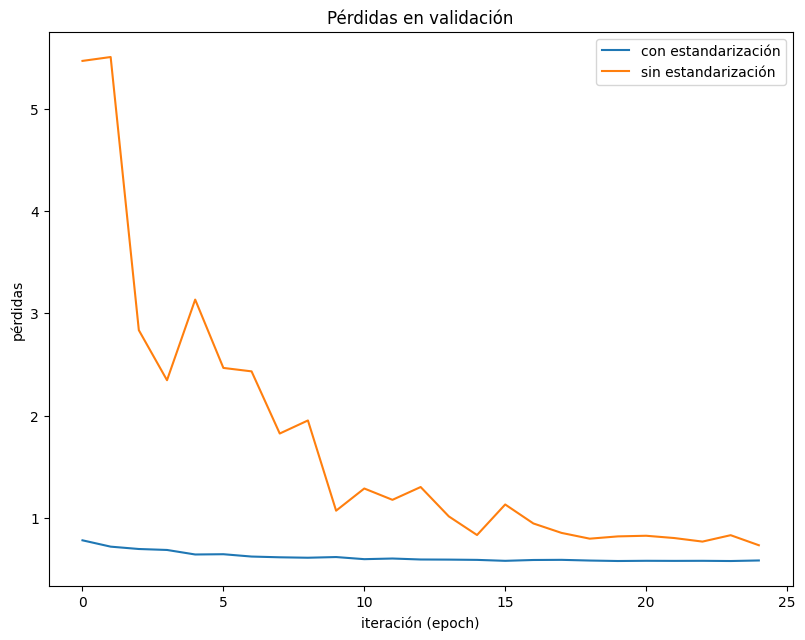

In [ ]:
plt.figure(figsize=(9.6, 7.2))
plt.plot(historial_cs.history['val_loss'])
plt.plot(historial_ss.history['val_loss'])

plt.title('Pérdidas en validación')
plt.ylabel('pérdidas')
plt.xlabel('iteración (epoch)')
plt.legend(["con estandarización","sin estandarización"], loc='best');

### Gráfica de exactitud (*accuracy*) con y sin estándarización

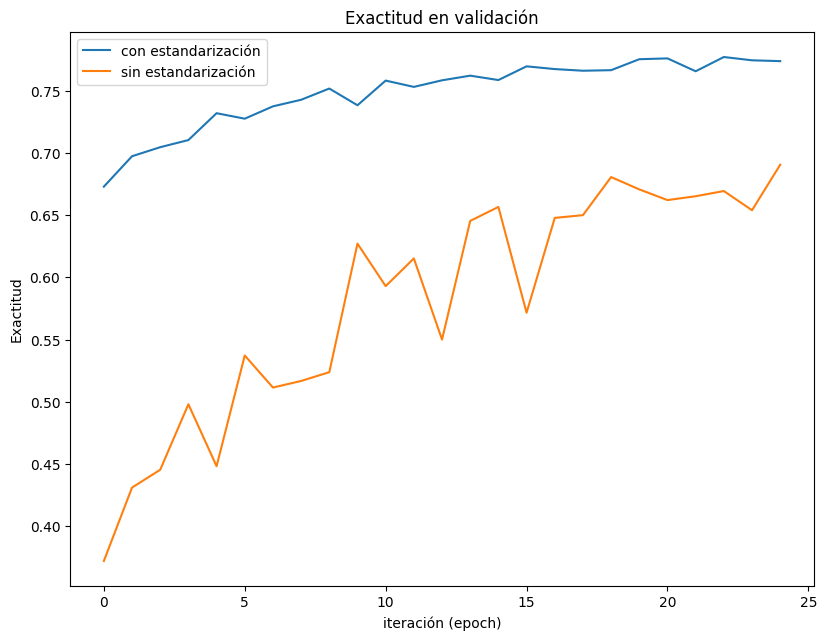

In [ ]:
plt.figure(figsize=(9.6, 7.2))
plt.plot(historial_cs.history['val_accuracy'])
plt.plot(historial_ss.history['val_accuracy'])

plt.title('Exactitud en validación')
plt.ylabel('Exactitud')
plt.xlabel('iteración (epoch)')
plt.legend(["con estandarización","sin estandarización"], loc='best');